In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
df_main = pd.read_csv("../data/features/features_stats_master.csv")
df_main.head()

,stat,word_count,character_count,average_word_length,sentence_count,TTR,RTTR,CTTR,DMetric,Mass,...,bigram_repetition_ratio,trigram_repetition_ratio,hapax_legomena_ratio,present_participle_count,passive_voice_count,conjunction_count,pronoun_count,contraction_count,model,data
0,mean,81.119462,335.829995,4.098665,4.431050,0.787898,0.127568,4.410816,0.007521,0.030797,...,0.027324,0.007130,0.646971,2.293390,0.233949,2.597089,2.663922,0.426363,human,nyt-comments
1,std,66.091653,279.873303,0.506520,3.429274,0.117334,0.059820,1.193748,0.005743,0.014047,...,0.036388,0.020004,0.165800,2.588001,0.560714,2.870722,3.051235,0.905561,human,nyt-comments
2,min,3.000000,11.000000,1.000000,1.000000,0.074074,0.023860,0.384900,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,human,nyt-comments
3,max,450.000000,2594.000000,59.000000,84.000000,1.000000,0.577350,9.959292,1.000000,0.787954,...,0.924528,0.923077,1.000000,59.000000,14.000000,35.000000,56.000000,30.000000,human,nyt-comments
4,median,60.000000,247.000000,4.081633,3.000000,0.788462,0.114462,4.333333,0.007095,0.032267,...,0.016556,0.000000,0.629630,2.000000,0.000000,2.000000,2.000000,0.000000,human,nyt-comments


In [3]:
def get_csv_paths(folder_path, recursive=False):
    if recursive:
        # Walk through all subdirectories
        file_paths = [os.path.join(root, file) 
                      for root, _, files in os.walk(folder_path) 
                      for file in files if file.endswith('.csv')]
    else:
        # Get files in the root folder only
        file_paths = [os.path.join(folder_path, file) 
                      for file in os.listdir(folder_path) 
                      if file.endswith('.csv')]
    
    return file_paths

In [4]:
paths_ai = get_csv_paths("../data/features/data_ai/", recursive=True)
paths_human = get_csv_paths("../data/features/data_human/")
datas = df_main["data"].unique()
datas.sort()

In [5]:
def get_data(data, feature, paths_ai, paths_human):
    ai_features = []
    for path in paths_ai:
        if data in path:
            df = pd.read_csv(path)
            ai_features.extend(df[feature].tolist())
    
    for path in paths_human:
        if data in path:
            df = pd.read_csv(path)
            human_features = df[feature].tolist()
    return ai_features, human_features

In [6]:
datas_names = ["Blogs", "Essays", "Natural Questions", "NYT Articles", "NYT Comments", "RAID", "Reddit", "Tweets", "WritingPrompts", "XSum"]

In [7]:
feature = "sentiment"
all_features = [get_data(ds, feature, paths_ai, paths_human) for ds in tqdm(datas)]
ai_features = [item[0] for item in all_features]
human_features = [item[1] for item in all_features]

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [09:56<00:00, 59.67s/it]


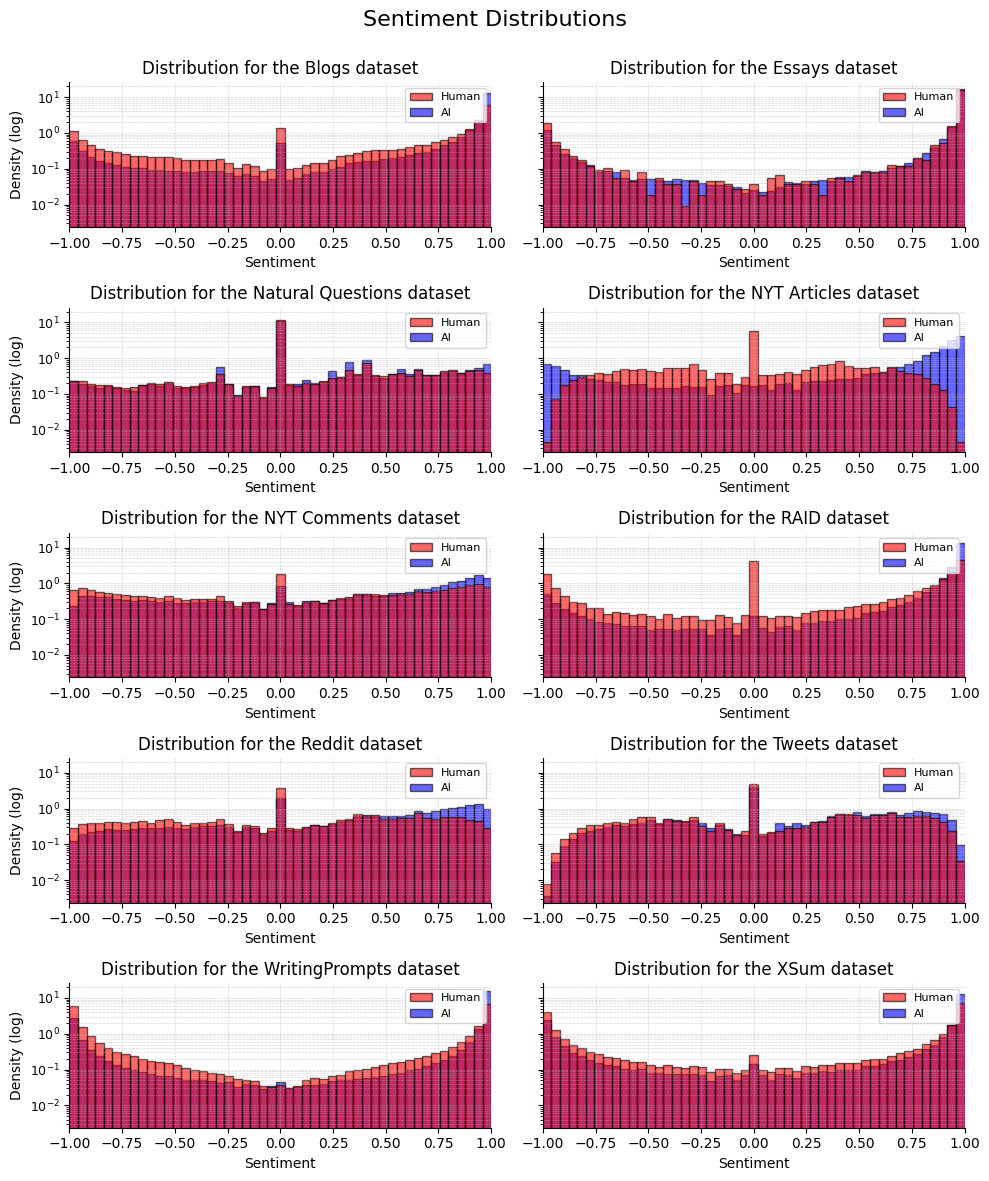

In [8]:
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharey=True)
axes = axes.flatten()
lim = 1
for i in range(10):
    ax = axes[i]
    
    ai_feat_clip = np.clip(ai_features[i], -1, lim)
    human_feat_clip = np.clip(human_features[i], -1, lim)

    combined_data = np.concatenate([human_feat_clip, ai_feat_clip])
    bins = np.linspace(combined_data.min(), combined_data.max(), 50)  # 50 bins = 51 edges

    ax.hist(ai_feat_clip, bins=bins, alpha=0.6, label='AI', color='blue', density=True, edgecolor='black', linewidth=1)
    ax.hist(human_feat_clip, bins=bins, alpha=0.6, label='Human', color='red', density=True, edgecolor='black', linewidth=1)
    
    ax.set_title(f"Distribution for the {datas_names[i]} dataset", fontsize=12)
    ax.set_xlabel("Sentiment", fontsize=10)
    ax.set_yscale("log")
    if i % 2 == 0:
        ax.set_ylabel("Density (log)", fontsize=10)
        ax.tick_params(axis='y', labelsize=9)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(-1, lim)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right', fontsize=8)

fig.suptitle("Sentiment Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [9]:
feature = "word_count"
all_features = [get_data(ds, feature, paths_ai, paths_human) for ds in tqdm(datas)]
ai_features = [item[0] for item in all_features]
human_features = [item[1] for item in all_features]

100%|██████████| 10/10 [08:38<00:00, 51.84s/it]


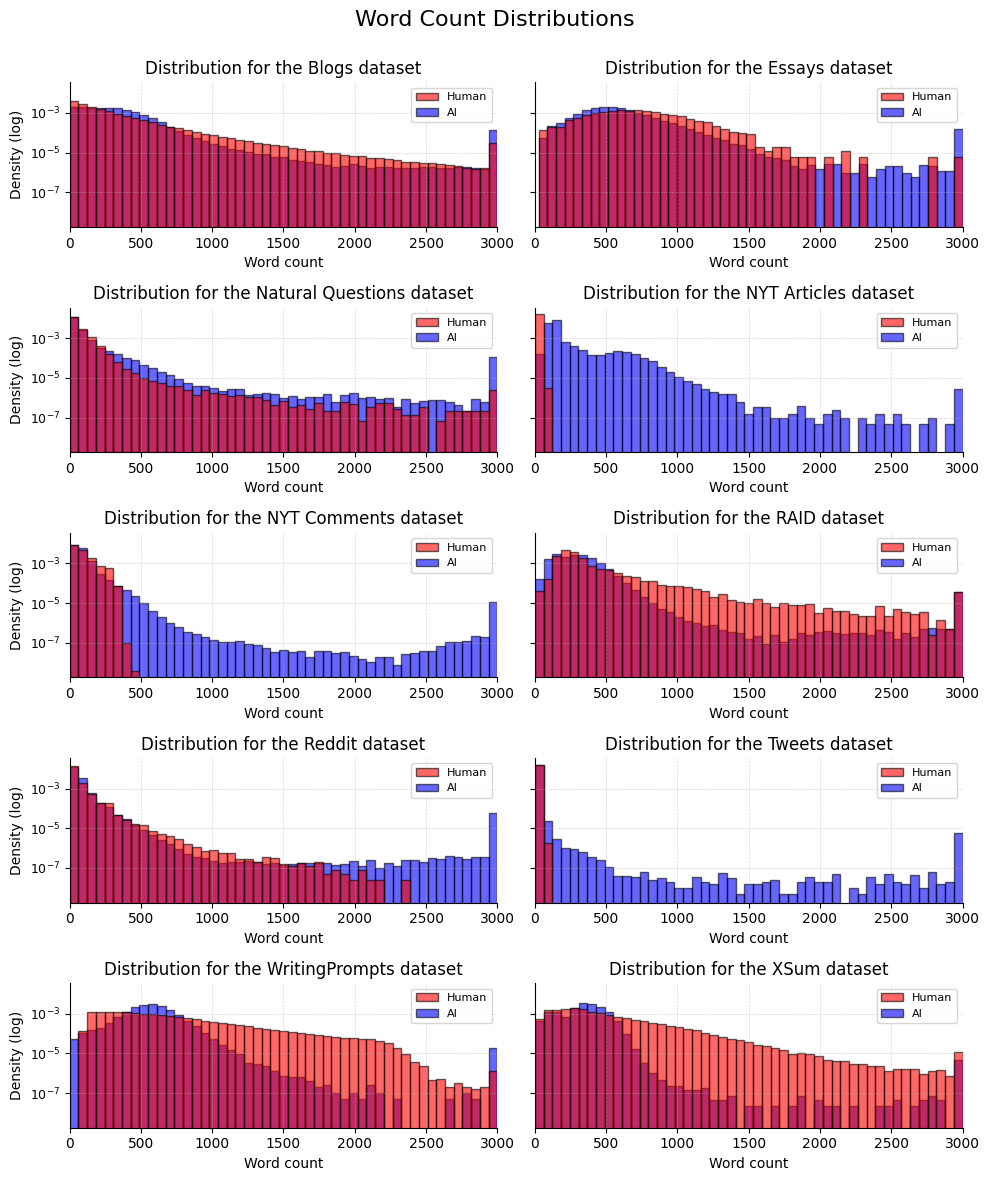

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharey=True)
axes = axes.flatten()
lim = 3000
for i in range(10):
    ax = axes[i]
    
    ai_feat_clip = np.clip(ai_features[i], 0, lim)
    human_feat_clip = np.clip(human_features[i], 0, lim)

    combined_data = np.concatenate([human_feat_clip, ai_feat_clip])
    bins = np.linspace(combined_data.min(), combined_data.max(), 50)  # 50 bins = 51 edges

    ax.hist(ai_feat_clip, bins=bins, alpha=0.6, label='AI', color='blue', density=True, edgecolor='black', linewidth=1)
    ax.hist(human_feat_clip, bins=bins, alpha=0.6, label='Human', color='red', density=True, edgecolor='black', linewidth=1)
    
    ax.set_title(f"Distribution for the {datas_names[i]} dataset", fontsize=12)
    ax.set_xlabel("Word count", fontsize=10)
    ax.set_yscale("log")
    if i % 2 == 0:
        ax.set_ylabel("Density (log)", fontsize=10)
        ax.tick_params(axis='y', labelsize=9)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0, lim)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right', fontsize=8)

fig.suptitle("Word Count Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [11]:
feature = "average_sentence_length"
all_features = [get_data(ds, feature, paths_ai, paths_human) for ds in tqdm(datas)]
ai_features = [item[0] for item in all_features]
human_features = [item[1] for item in all_features]

100%|██████████| 10/10 [08:43<00:00, 52.35s/it]


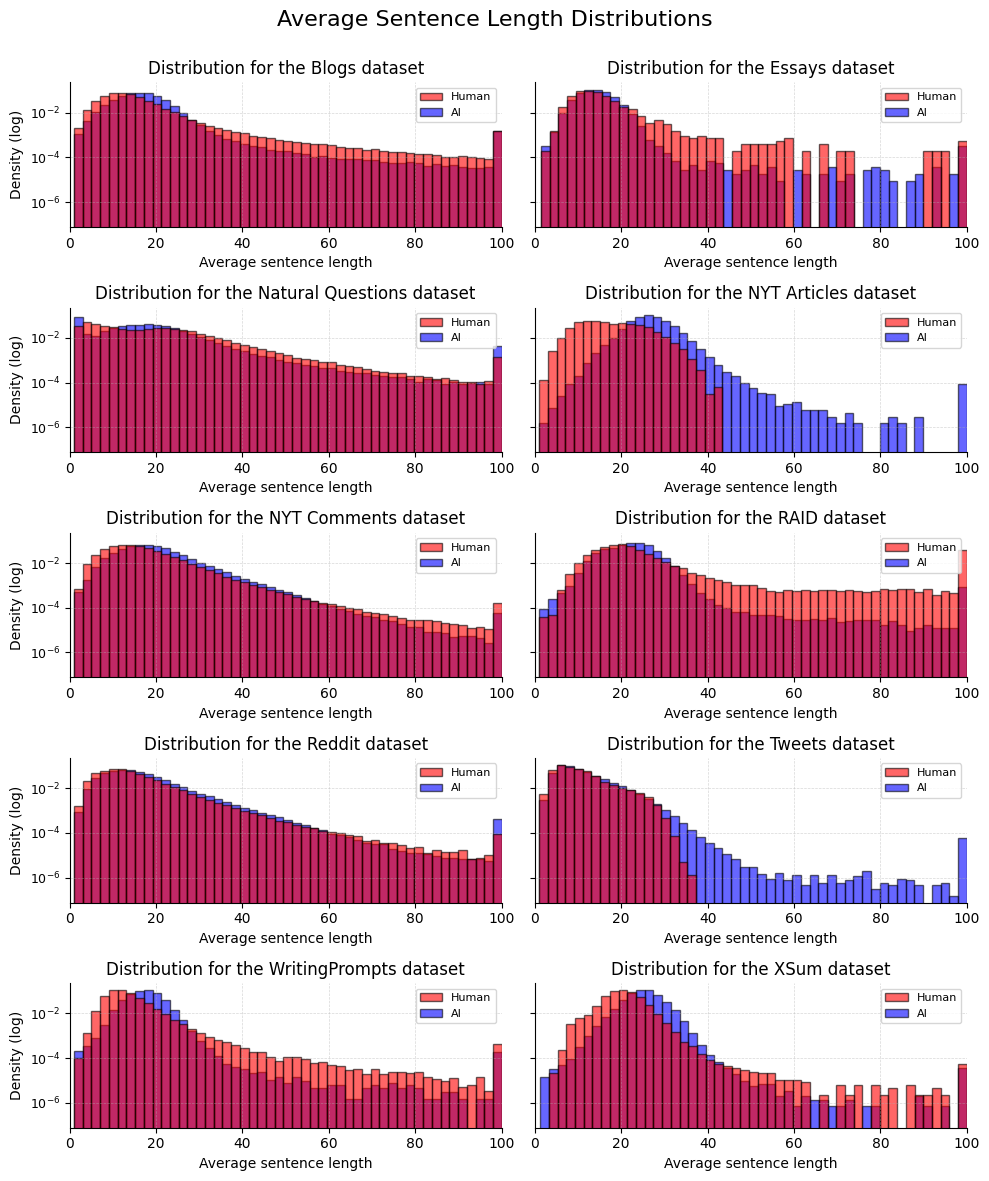

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharey=True)
axes = axes.flatten()
lim = 100
for i in range(10):
    ax = axes[i]
    
    ai_feat_clip = np.clip(ai_features[i], 0, lim)
    human_feat_clip = np.clip(human_features[i], 0, lim)

    combined_data = np.concatenate([human_feat_clip, ai_feat_clip])
    bins = np.linspace(combined_data.min(), combined_data.max(), 50)  # 50 bins = 51 edges

    ax.hist(ai_feat_clip, bins=bins, alpha=0.6, label='AI', color='blue', density=True, edgecolor='black', linewidth=1)
    ax.hist(human_feat_clip, bins=bins, alpha=0.6, label='Human', color='red', density=True, edgecolor='black', linewidth=1)
    
    ax.set_title(f"Distribution for the {datas_names[i]} dataset", fontsize=12)
    ax.set_xlabel("Average sentence length", fontsize=10)
    ax.set_yscale("log")
    ax.set_xlim(0, lim)
    if i % 2 == 0:
        ax.set_ylabel("Density (log)", fontsize=10)
        ax.tick_params(axis='y', labelsize=9)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right', fontsize=8)

fig.suptitle("Average Sentence Length Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [13]:
feature = "TTR"
all_features = [get_data(ds, feature, paths_ai, paths_human) for ds in tqdm(datas)]
ai_features = [item[0] for item in all_features]
human_features = [item[1] for item in all_features]

100%|██████████| 10/10 [09:32<00:00, 57.24s/it]


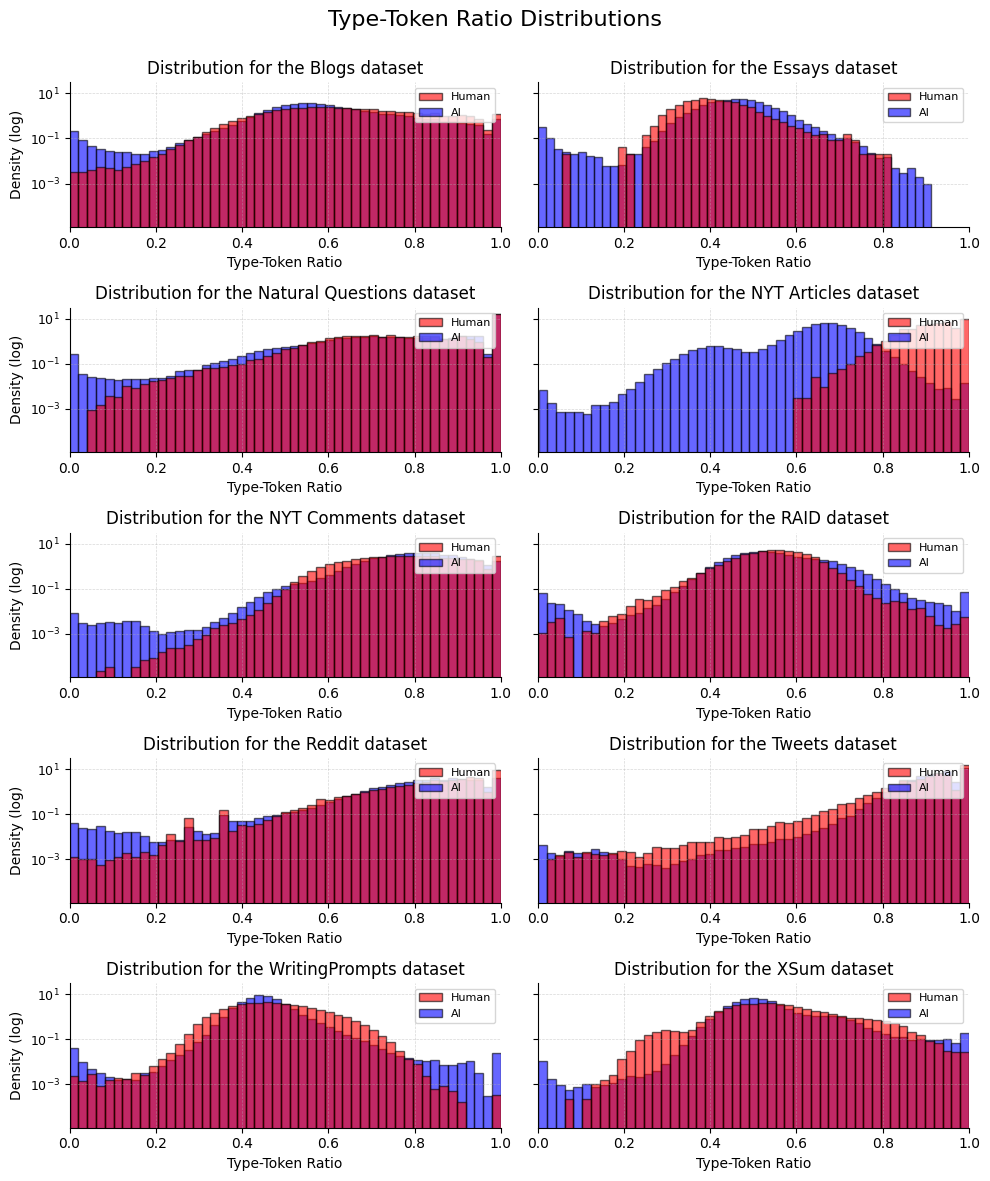

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharey=True)
axes = axes.flatten()
lim = 1
for i in range(10):
    ax = axes[i]
    
    ai_feat_clip = np.clip(ai_features[i], 0, lim)
    human_feat_clip = np.clip(human_features[i], 0, lim)

    combined_data = np.concatenate([human_feat_clip, ai_feat_clip])
    bins = np.linspace(combined_data.min(), combined_data.max(), 50)  # 50 bins = 51 edges

    ax.hist(ai_feat_clip, bins=bins, alpha=0.6, label='AI', color='blue', density=True, edgecolor='black', linewidth=1)
    ax.hist(human_feat_clip, bins=bins, alpha=0.6, label='Human', color='red', density=True, edgecolor='black', linewidth=1)
    
    ax.set_title(f"Distribution for the {datas_names[i]} dataset", fontsize=12)
    ax.set_xlabel("Type-Token Ratio", fontsize=10)
    ax.set_yscale("log")
    ax.set_xlim(0, lim)
    if i % 2 == 0:
        ax.set_ylabel("Density (log)", fontsize=10)
        ax.tick_params(axis='y', labelsize=9)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right', fontsize=8)

fig.suptitle("Type-Token Ratio Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [15]:
def get_data(data, feature, paths_ai, paths_human):
    ai_features = []
    for path in paths_ai:
        if data in path:
            df = pd.read_csv(path)
            ai_features.extend(df[feature].to_numpy())
    
    for path in paths_human:
        if data in path:
            df = pd.read_csv(path)
            human_features = df[feature].to_numpy()
    return ai_features, human_features

In [16]:
feature = ["word_count", "TTR"]
all_features = [get_data(ds, feature, paths_ai, paths_human) for ds in tqdm(datas)]

100%|██████████| 10/10 [11:02<00:00, 66.24s/it]


In [17]:
ai_features = [item[0] for item in all_features]
human_features = [item[1] for item in all_features]

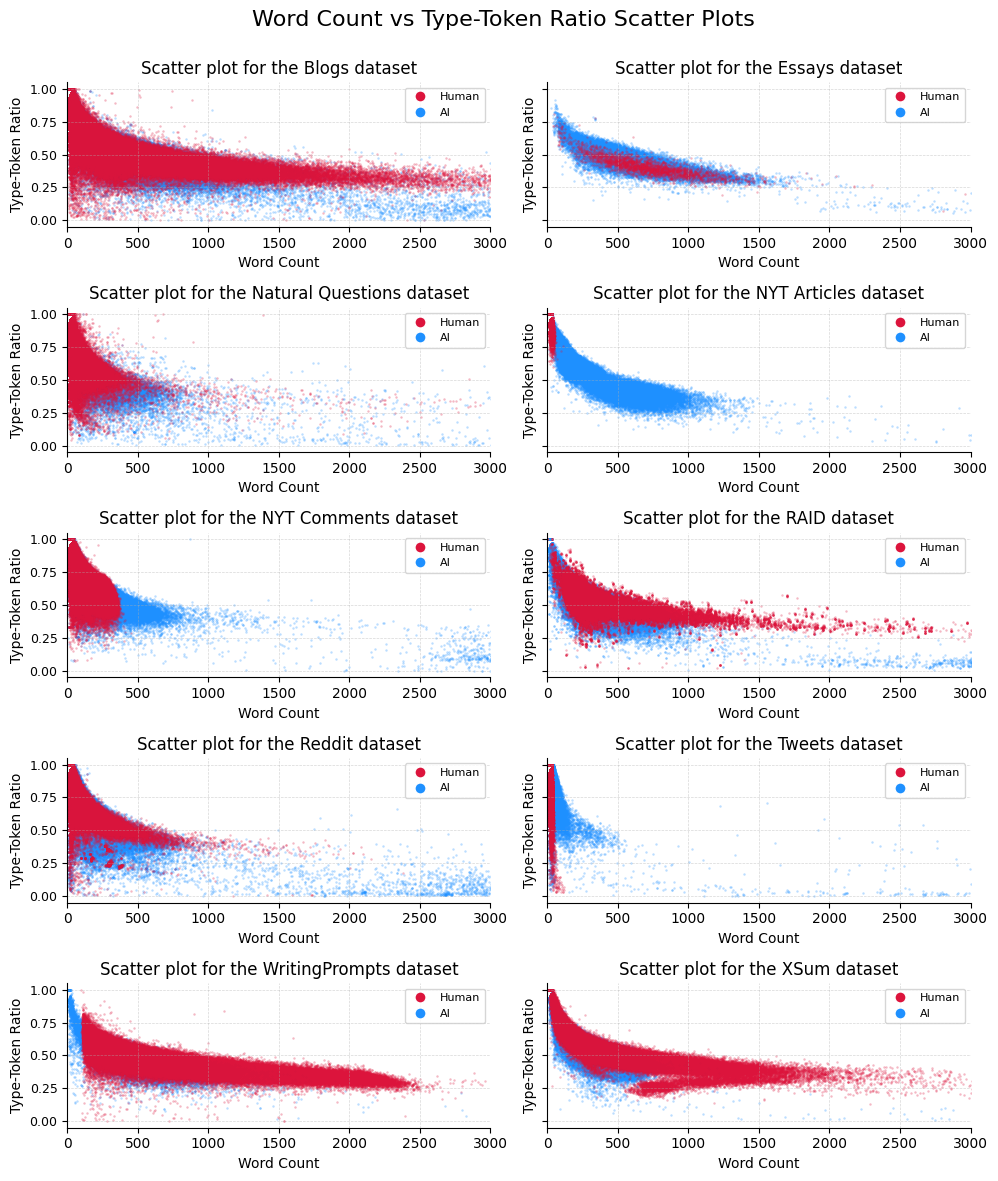

In [20]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharey=True)
axes = axes.flatten()
lim = 3000
for i in range(10):
    ax = axes[i]
    # ai_feat_clip = np.clip(ai_features[i], 0, lim)
    # human_feat_clip = np.clip(human_features[i], 0, lim)

    ax.scatter(np.vstack(ai_features[i])[:,0], np.vstack(ai_features[i])[:,1], alpha=0.3, label='AI', color='dodgerblue', edgecolor='black', linewidth=0, s=3)
    ax.scatter(np.vstack(human_features[i])[:,0], np.vstack(human_features[i])[:,1], alpha=0.3, label='Human', color='crimson', edgecolor='black', linewidth=0, s=3)
    
    ax.set_title(f"Scatter plot for the {datas_names[i]} dataset", fontsize=12)
    ax.set_ylabel("Type-Token Ratio", fontsize=10)
    ax.set_xlabel("Word Count", fontsize=10)
    # ax.set_yscale("log")
    ax.set_xlim(0, lim)
    if i % 2 == 0:
        ax.tick_params(axis='y', labelsize=9)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    legend_handles = [
        Line2D([0], [0], marker='o', color='w', label='Human',
            markerfacecolor='crimson', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='AI',
            markerfacecolor='dodgerblue', markersize=8)
    ]

    ax.legend(legend_handles, ['Human', "AI"], loc='upper right', fontsize=8)

fig.suptitle("Word Count vs Type-Token Ratio Scatter Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [21]:
feature = ["Mass", "conjunction_count", "gunning_fog_index", "entropy_score"]

In [23]:
for ds in tqdm(datas):
    ai_data, human_data = get_data(ds, feature, paths_ai, paths_human)
    
    # Convert numpy arrays to DataFrame and then to dict
    ai_data_dict = pd.DataFrame(ai_data, columns=feature).to_dict(orient="records")
    human_data_dict = pd.DataFrame(human_data, columns=feature).to_dict(orient="records")
    
    # Prepare records with source and dataset info
    all_records = []
    all_records.extend([{**row, "source": "AI", "dataset": ds} for row in ai_data_dict])
    all_records.extend([{**row, "source": "Human", "dataset": ds} for row in human_data_dict])
    
    # Create DataFrame
    df_all = pd.DataFrame(all_records)
    
    # Save to CSV (append if the file exists, create new if not)
    df_all.to_csv("all_features.csv", mode='a', header=not pd.io.common.file_exists("all_features.csv"), index=False)

100%|██████████| 10/10 [12:08<00:00, 72.83s/it]


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("all_features.csv")
data.drop(columns=["dataset"], inplace=True)

In [3]:
data

,Mass,conjunction_count,gunning_fog_index,entropy_score,source
0,0.045091,9.0,8.33,4.684908,AI
1,0.013160,0.0,11.81,2.926418,AI
2,0.044869,24.0,9.71,4.899351,AI
3,0.047503,16.0,10.38,4.642823,AI
4,0.039312,5.0,8.67,4.253082,AI
...,...,...,...,...,...
20218432,0.034866,1.0,11.16,4.285495,Human
20218433,0.037332,13.0,13.23,4.938151,Human
20218434,0.035679,20.0,10.89,4.995213,Human
20218435,0.047363,19.0,12.04,5.032334,Human


In [43]:
data_sample = data.sample(1_000_000)

In [44]:
data_sample["Mass"] = data_sample["Mass"].clip(0, 0.2)
data_sample["gunning_fog_index"] = data_sample["gunning_fog_index"].clip(0, 20)
data_sample["conjunction_count"] = data_sample["conjunction_count"].clip(0, 40)

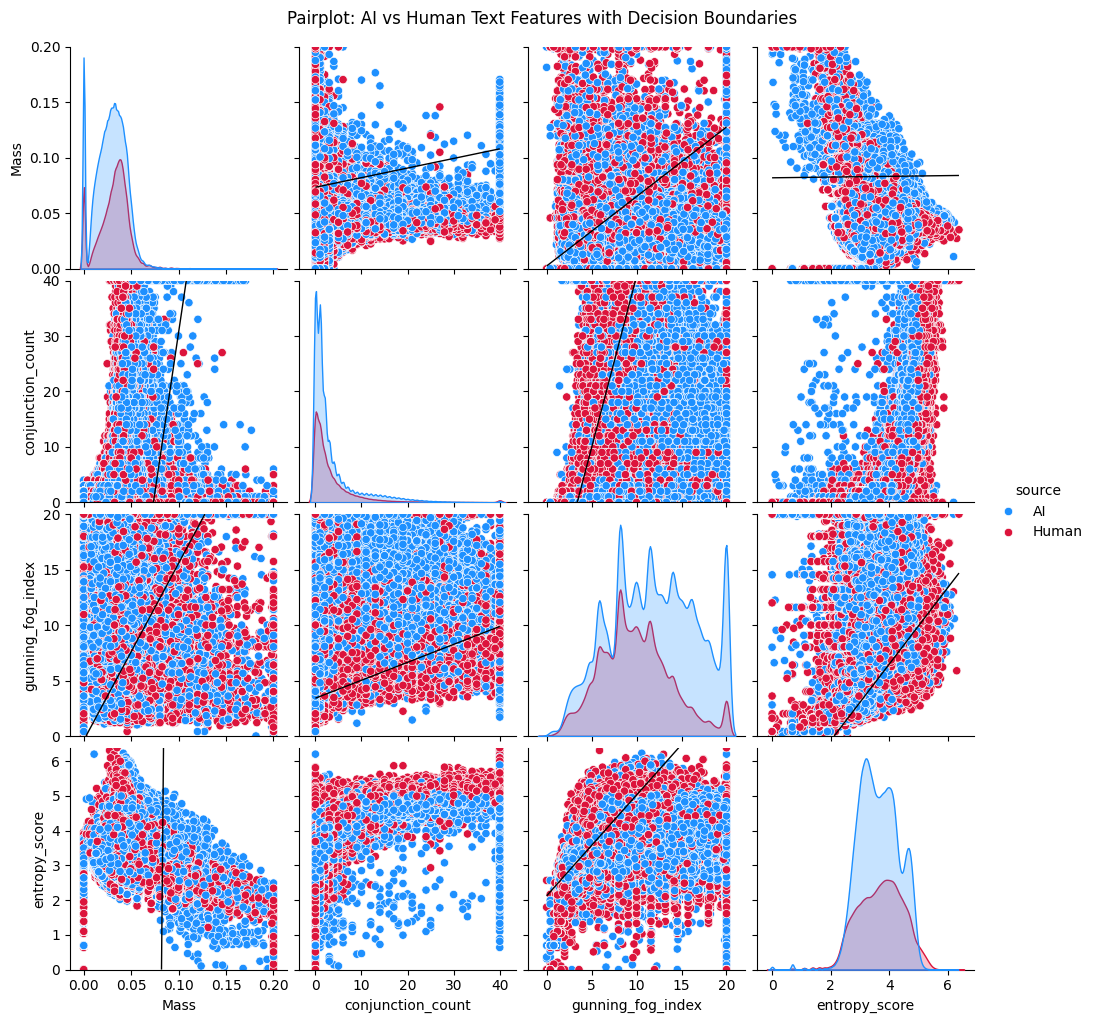

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Create the pairplot and return the PairGrid object
g = sns.pairplot(data_sample, hue='source', palette={'Human': 'crimson', 'AI': 'dodgerblue'})

# Map string labels to numeric for classifier
y = data_sample['source'].map({'Human': 0, 'AI': 1})

# Get list of feature names (excluding the label column)
features = [col for col in data_sample.columns if col != 'source']

# Loop through axes and draw separating lines
for i, row_var in enumerate(features):
    for j, col_var in enumerate(features):
        if i != j:
            ax = g.axes[i, j]
            X_pair = data_sample[[col_var, row_var]].values

            # Check for NaNs or constant columns
            if np.any(np.isnan(X_pair)) or np.any(np.isinf(X_pair)):
                continue
            if np.all(X_pair[:, 0] == X_pair[0, 0]) or np.all(X_pair[:, 1] == X_pair[0, 1]):
                continue

            try:
                clf = LogisticRegression().fit(X_pair, y)
                x_min, x_max = X_pair[:, 0].min(), X_pair[:, 0].max()
                y_min, y_max = X_pair[:, 1].min(), X_pair[:, 1].max()
                xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                                     np.linspace(y_min, y_max, 100))
                grid = np.c_[xx.ravel(), yy.ravel()]
                probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

                ax.contour(xx, yy, probs, levels=[0.5], colors='black', linewidths=1)
            except Exception as e:
                print(f"Skipping plot for ({col_var}, {row_var}) due to error: {e}")

# Set a title for the plot
plt.suptitle("Pairplot: AI vs Human Text Features with Decision Boundaries", y=1.02)

# Show the plot
plt.show()